In [ ]:
from sklearn.datasets import fetch_openml
# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
###
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
col_to_keep = ['Website Link', 'App Link', 'Team Size', 'revenue slab',
       'VC funded', 'Angle funding / Seed funding', 'B2B', 'Crowd funded', 'Bootstrapped',
       'Product is not live yet', 'B2C', 'C2C', 'B2B2C', 'Govt. funded',
       'Bank funded / Loan', 'Incubator/Accelerator funded',
       'Collected from worksheet',"[Traction] Less than 2" ,
        "[Traction] More than 2","[Traction] makes sense", 'Label']

## Download and Load the Data

In [ ]:
# You can add your dataframe here
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv("/content/gdrive/MyDrive/Dlabs_Internship/Test_data/customer traction/output.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
col_to_keep = ['Website Link', 'App Link', 'Team Size', 'revenue slab',
       'VC funded', 'Angle funding / Seed funding', 'B2B', 'Crowd funded', 'Bootstrapped',
       'Product is not live yet', 'B2C', 'C2C', 'B2B2C', 'Govt. funded',
       'Bank funded / Loan', 'Incubator/Accelerator funded',
       'Collected from worksheet',"[Traction] Less than 2" ,
        "[Traction] More than 2","[Traction] makes sense", 'Label']
X = col_to_keep[:-1]
y = col_to_keep[-1]
df = df[col_to_keep]

In [ ]:
df.head()

,Website Link,App Link,Team Size,revenue slab,VC funded,Angle funding / Seed funding,B2B,Crowd funded,Bootstrapped,Product is not live yet,...,C2C,B2B2C,Govt. funded,Bank funded / Loan,Incubator/Accelerator funded,Collected from worksheet,[Traction] Less than 2,[Traction] More than 2,[Traction] makes sense,Label
0,1,1,10,5.0,0,0,1,0,1,0,...,0,1,0,0,0,2021,0,1,0,0
1,1,0,10,62.5,0,0,1,0,1,0,...,0,0,0,0,0,2021,1,0,1,0
2,1,0,15,5.0,0,0,1,0,1,0,...,0,0,0,0,0,2021,0,1,1,0
3,1,0,10,15.0,0,0,0,0,1,0,...,0,0,0,0,0,2021,0,1,0,0
4,1,0,10,500.0,0,0,1,0,0,0,...,0,0,0,0,0,2021,0,1,0,0


## Splitting Data into Training and Test Sets

In [ ]:
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split(
    df[X], df[y], test_size=1/7.0, random_state=0)

## Standardizing the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_img)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(0.85)

In [ ]:
pca.fit(train_img)

PCA(n_components=0.85)

In [ ]:
pca.n_components_

9

In [ ]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
# solver = 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [ ]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression()

## Measuring Model Performance

In [ ]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9781491002570694


# Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score
logisticRegr = LogisticRegression(solver = 'liblinear')
for i in range(1,80,10):
  scores = cross_val_score(logisticRegr, df[X], df[y], cv=10)
  print(i, " : ",sum(scores)/len(scores))

1  :  0.9764749730167297
11  :  0.9764749730167297
21  :  0.9764749730167297
31  :  0.9764749730167297
41  :  0.9764749730167297
51  :  0.9764749730167297
61  :  0.9764749730167297
71  :  0.9764749730167297


# Equal count

In [ ]:
df_new = df[ df["Label"]==1 ]
df_new = df_new.append(df[df["Label"]==0].head(128))
df_new = shuffle(df_new).reset_index()

In [ ]:
train_img, test_img, train_lbl, test_lbl = train_test_split(
    df_new[X], df_new[y], test_size=1/7.0, random_state=0)

In [ ]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_img)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [ ]:
model = LogisticRegression(solver = 'liblinear')
model.fit(train_img, train_lbl)
score = model.score(test_img, test_lbl)
print(score)

0.8648648648648649


In [ ]:
model = SVC(gamma='auto')
model.fit(train_img, train_lbl)
score = model.score(test_img, test_lbl)
print(score)

0.8378378378378378


In [ ]:
model = DecisionTreeClassifier(random_state=0)
model.fit(train_img, train_lbl)
score = model.score(test_img, test_lbl)
print(score)

0.8108108108108109


In [ ]:
model = RandomForestClassifier(max_depth=4, random_state=0)
model.fit(train_img, train_lbl)
score = model.score(test_img, test_lbl)
print(score)

0.8918918918918919


In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_img, train_lbl)
score = model.score(test_img, test_lbl)
print(score)

0.7297297297297297


## Recall

In [ ]:
from sklearn.metrics import recall_score

y_pred = model.predict(test_img)
y_true = test_lbl
recall_score(y_true, y_pred, average='macro')

0.7280701754385965

In [ ]:
from sklearn.metrics import recall_score

y_pred = model.predict(df[X])
y_true = df[y]
recall_score(y_true, y_pred, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.43268060064935066

## F1

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_true, y_pred, average='macro')

0.41948798346536115

#AUC curve

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

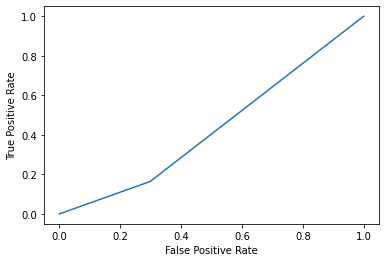

In [ ]:
plot_roc_curve(y_true, y_pred)

In [ ]:
sum(y_pred)

1608